In [1]:
# Importing essesntial libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_cleaned.csv')
df.shape

(891, 25)

In [3]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [4]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


#### Since the data was already cleaned and analysed while I was building KNN Modelon the same dataset, I will directly build model

## Segregating Variables

In [5]:
x= df.drop(['Survived'], axis=1)
y=df['Survived']
x.shape, y.shape

((891, 24), (891,))

## Splitting data into train and test sets

In [6]:
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(x, y, random_state=101, stratify= y, test_size=0.25)

trainx.shape, testx.shape

((668, 24), (223, 24))

In [7]:
# Testing the working of stratify parameter
trainy.value_counts(normalize=True), testy.value_counts(normalize=True)

(0    0.616766
 1    0.383234
 Name: Survived, dtype: float64,
 0    0.61435
 1    0.38565
 Name: Survived, dtype: float64)

## Training Model

In [8]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Igroring other parameters for now to build a simple decision tree
dtc=DecisionTreeClassifier(random_state=10)

In [10]:
dtc.fit(trainx, trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

## Evaluating Model

In [11]:
dtc.score(trainx, trainy), dtc.score(testx, testy)

(0.9880239520958084, 0.7533632286995515)

#### Our model gives 98% accuracy on train set and 75% accuracy on test set. This difference is quite large which signifies that our model has overfitted on train set.

## Altering parameters of decision tree to find best fitting model

In [12]:
s1=[]
s2=[]
ran=range(2,15)
for i in ran:
    dtc=DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(trainx, trainy)
    s1.append(dtc.score(trainx, trainy))
    s2.append(dtc.score(testx,testy))

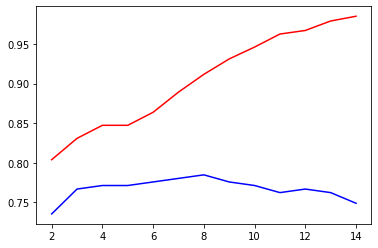

In [13]:
plt.plot(ran, s1, c= 'red')
plt.plot(ran, s2, c='blue')

### Tree is most efficient if max depth is 8

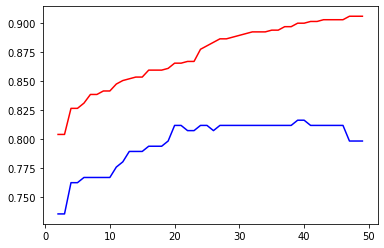

In [14]:
s1=[]
s2=[]
ran=range(2,50)
for i in ran:
    dtc=DecisionTreeClassifier(max_depth=8, max_leaf_nodes=i, random_state=10)
    dtc.fit(trainx, trainy)
    s1.append(dtc.score(trainx, trainy))
    s2.append(dtc.score(testx,testy))

plt.plot(ran, s1, c= 'red')
plt.plot(ran, s2, c='blue')

### Tree is most efficient if max leaves is 20

In [15]:
## Using the efficient values of parameter to build a decision tree and evaluating

In [16]:
dtc=DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, random_state=10)
dtc.fit(trainx, trainy)
dtc.score(trainx, trainy), dtc.score(testx, testy)

(0.8652694610778443, 0.8116591928251121)

## Our model performs well on both test and train datasets, giving a consistent performance of above 80.